In [ ]:
!pip install torch torchvision opencv-python-headless numpy matplotlib


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 6_A J C Bose Rd & Ballygunge Circular Rd (S)(44.32)2.mkv to 6_A J C Bose Rd & Ballygunge Circular Rd (S)(44.32)2.mkv


In [ ]:
import cv2
import os

def video_to_frames_every_interval(video_path, output_dir, interval_sec=30):
    os.makedirs(output_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return

    fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second
    interval_frames = fps * interval_sec  # Interval in frames
    frame_count = 0
    extracted_frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % interval_frames == 0:
            frame_path = os.path.join(output_dir, f'frame_{extracted_frame_count:04d}.jpg')
            cv2.imwrite(frame_path, frame)
            extracted_frame_count += 1

        frame_count += 1

    cap.release()
    print(f"Extracted {extracted_frame_count} frames from {video_path}")

# Automatically use the uploaded video file name
video_path = list(uploaded.keys())[0]
video_to_frames_every_interval(video_path, 'frames', interval_sec=30)


Extracted 1 frames from 6_A J C Bose Rd & Ballygunge Circular Rd (S)(44.32)2.mkv


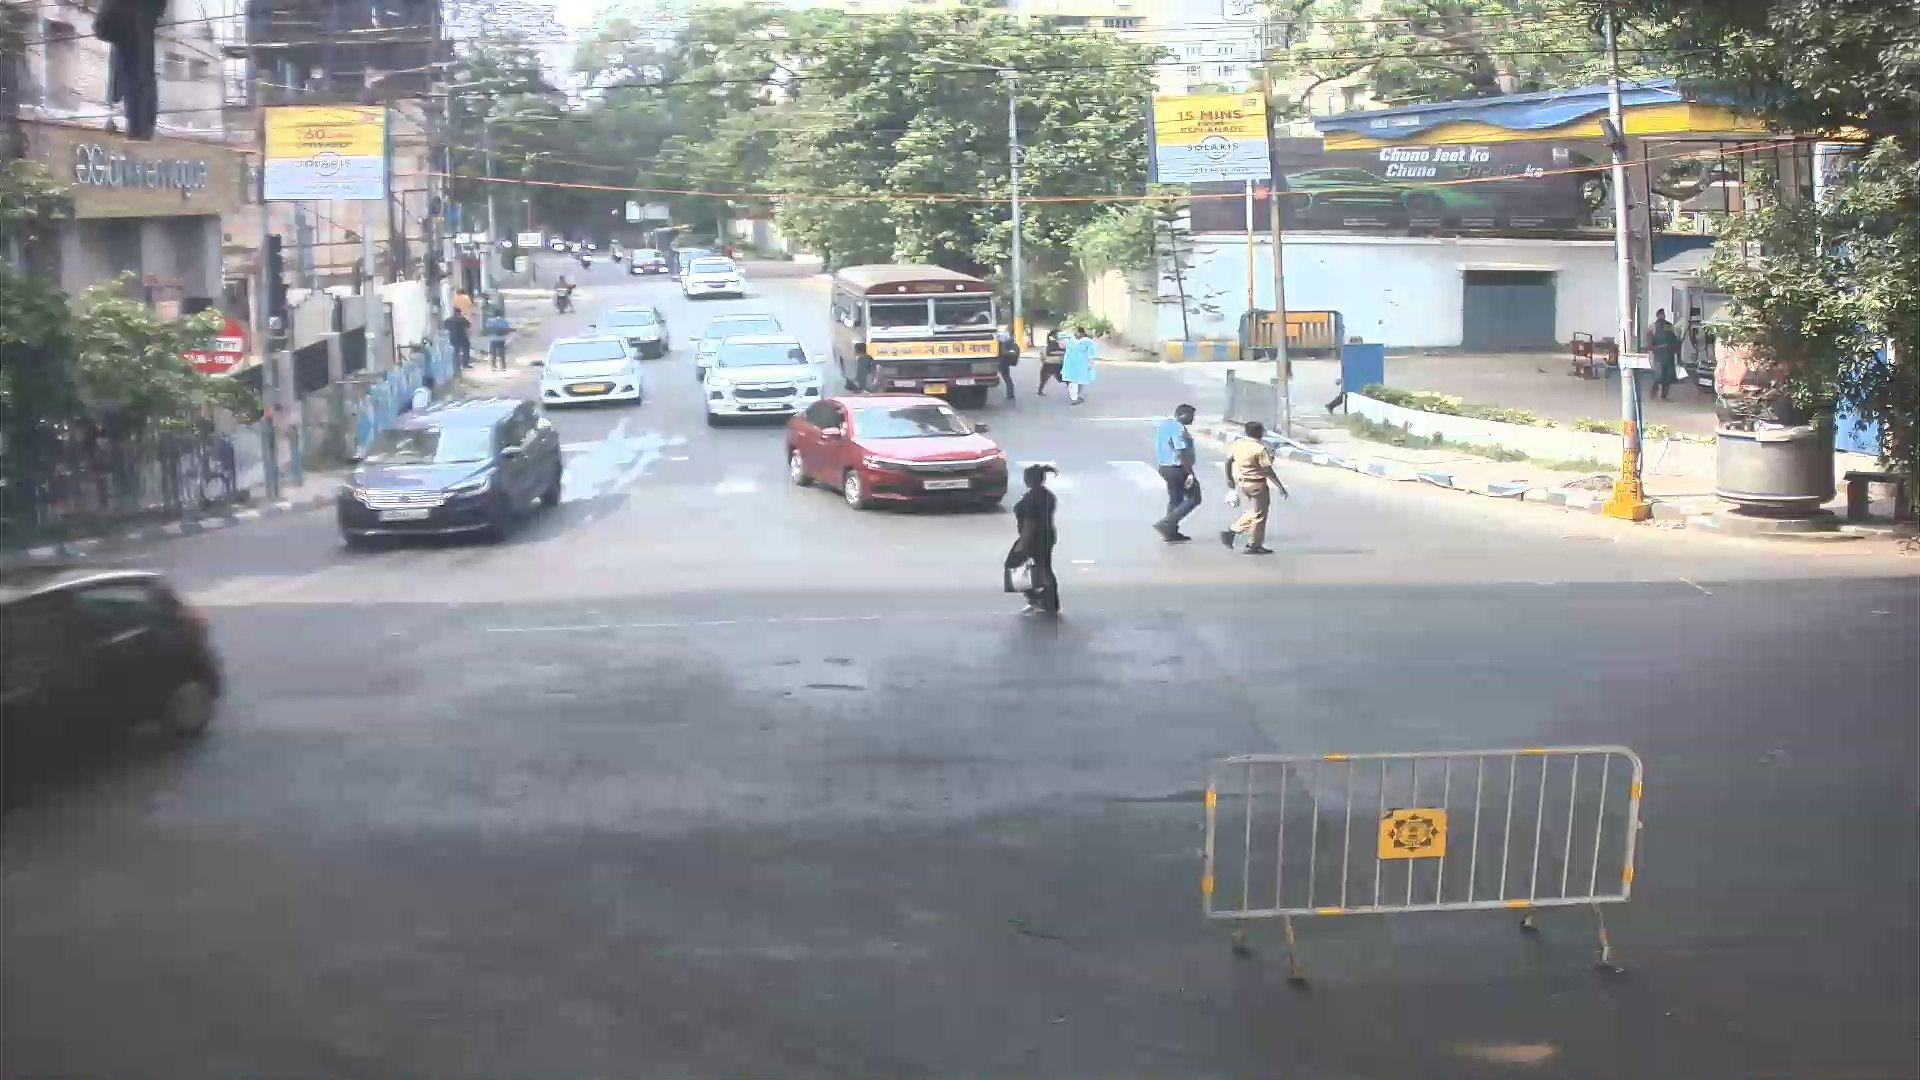

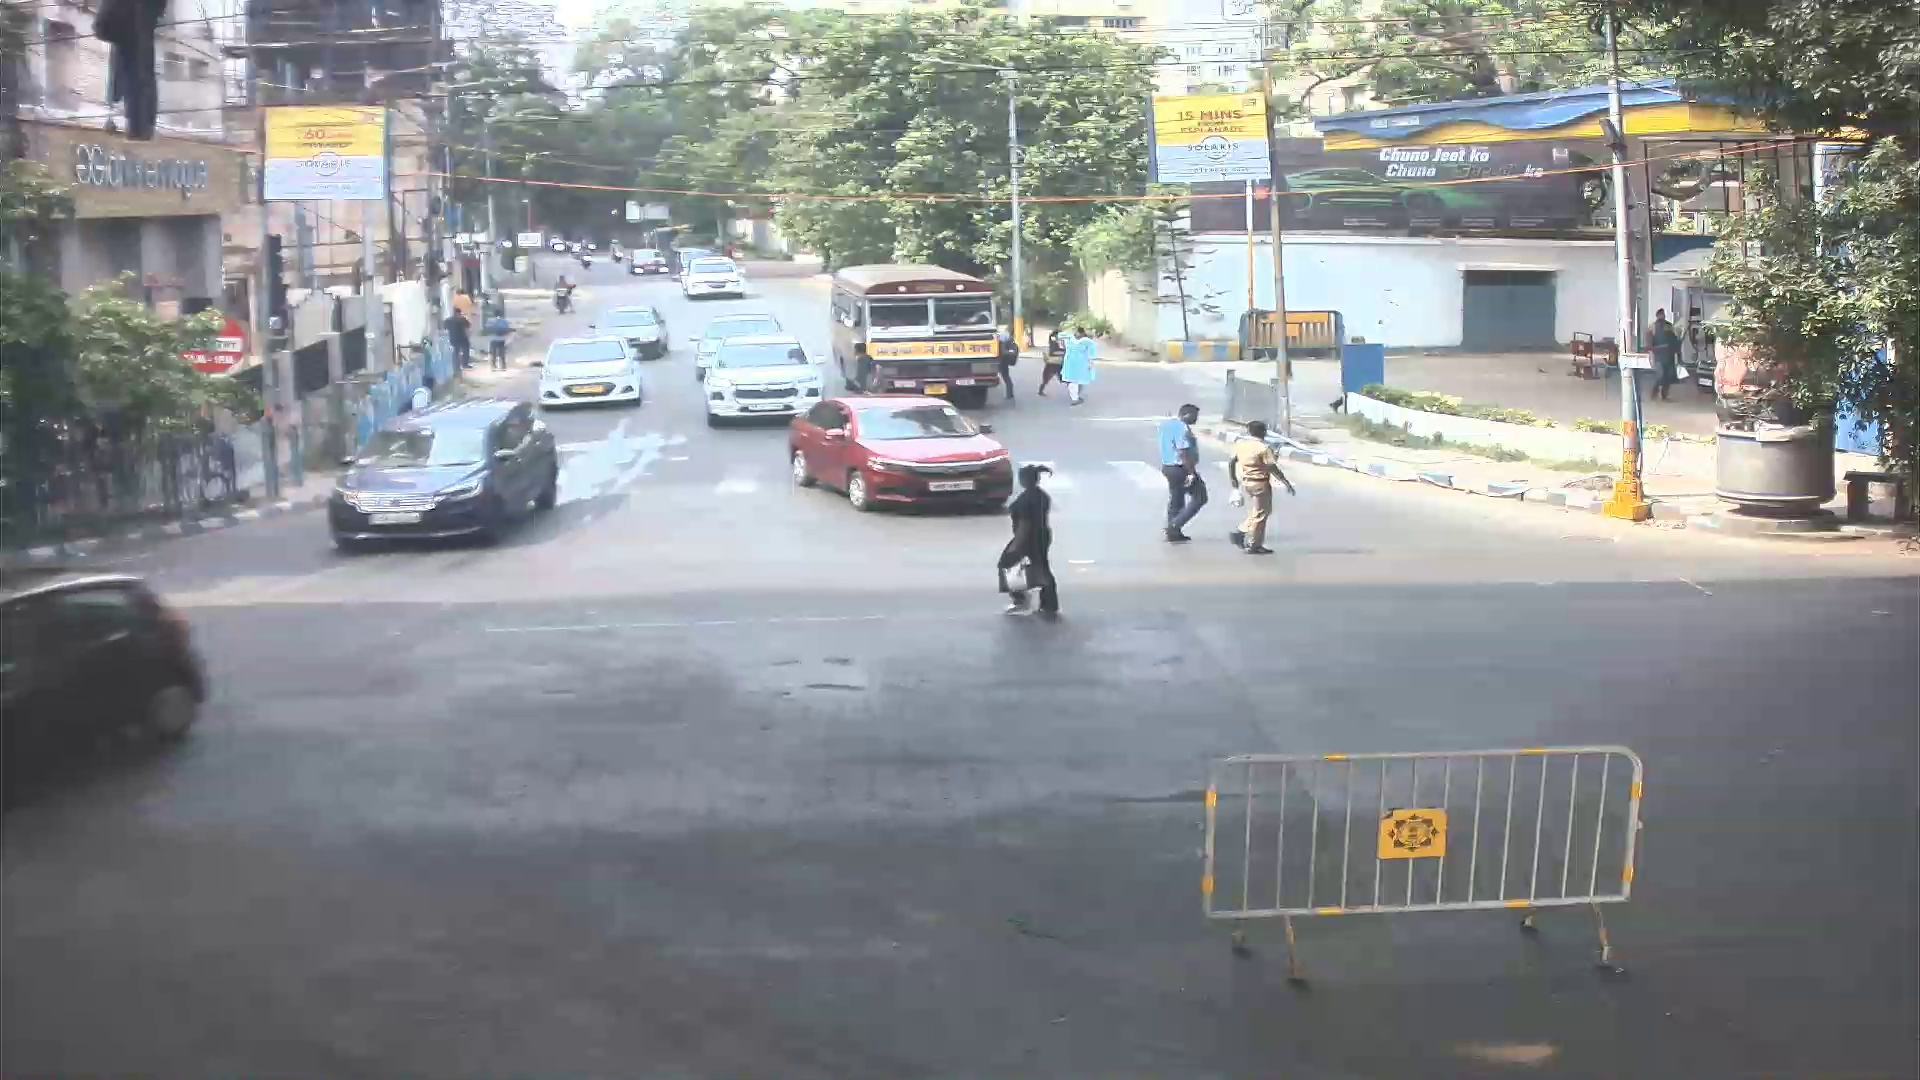

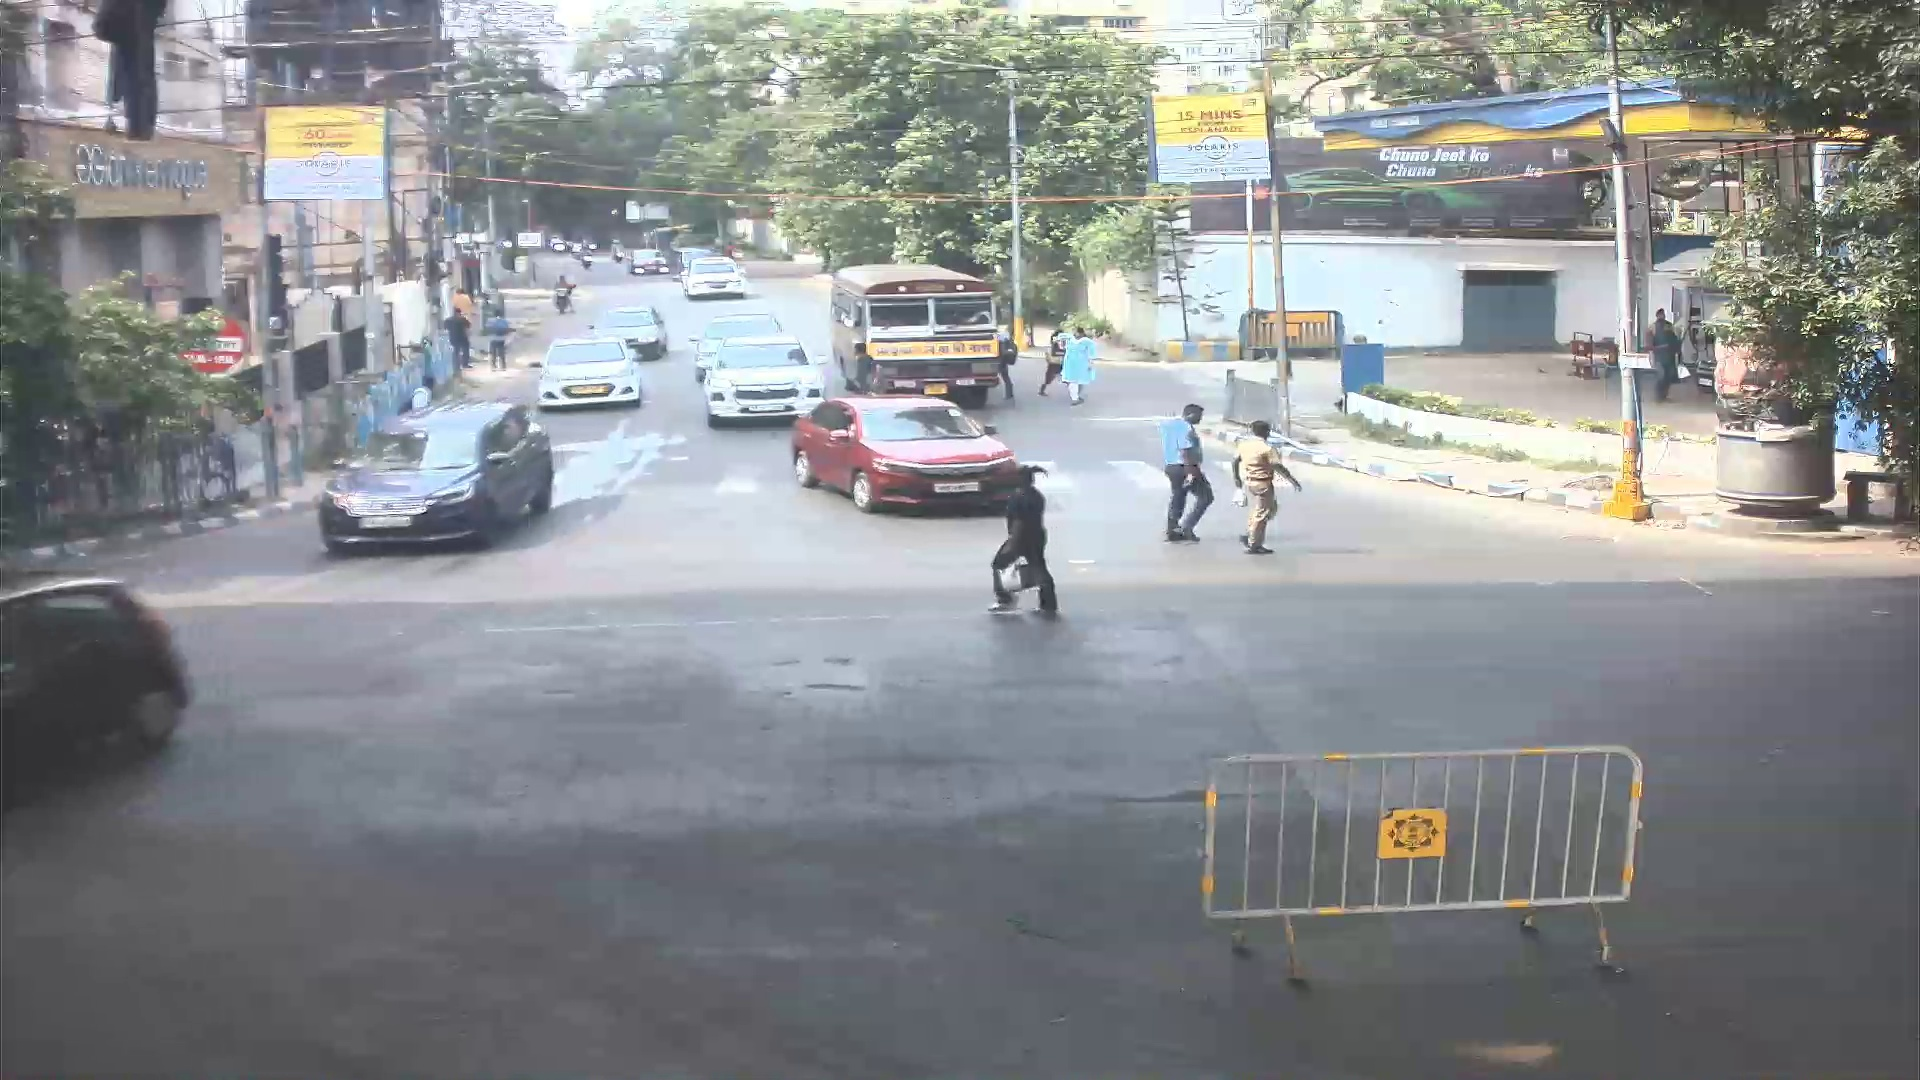

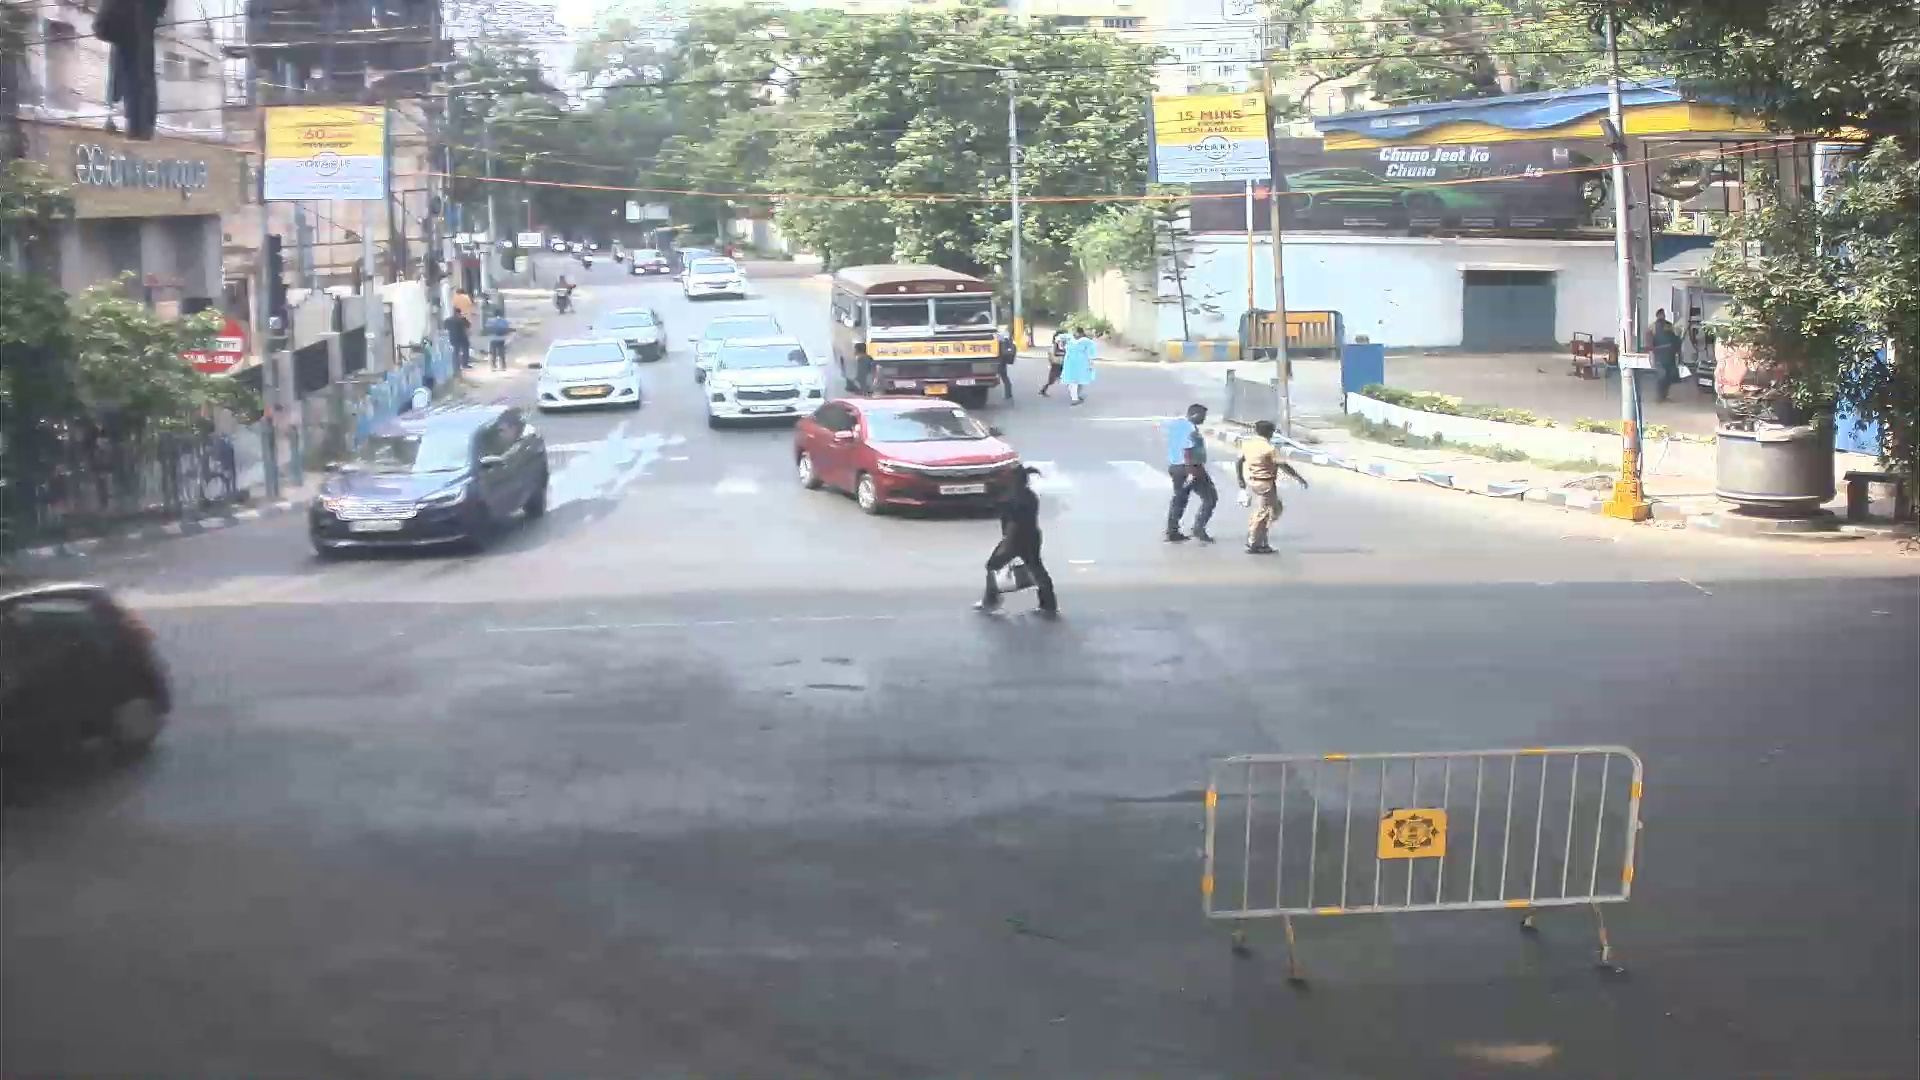

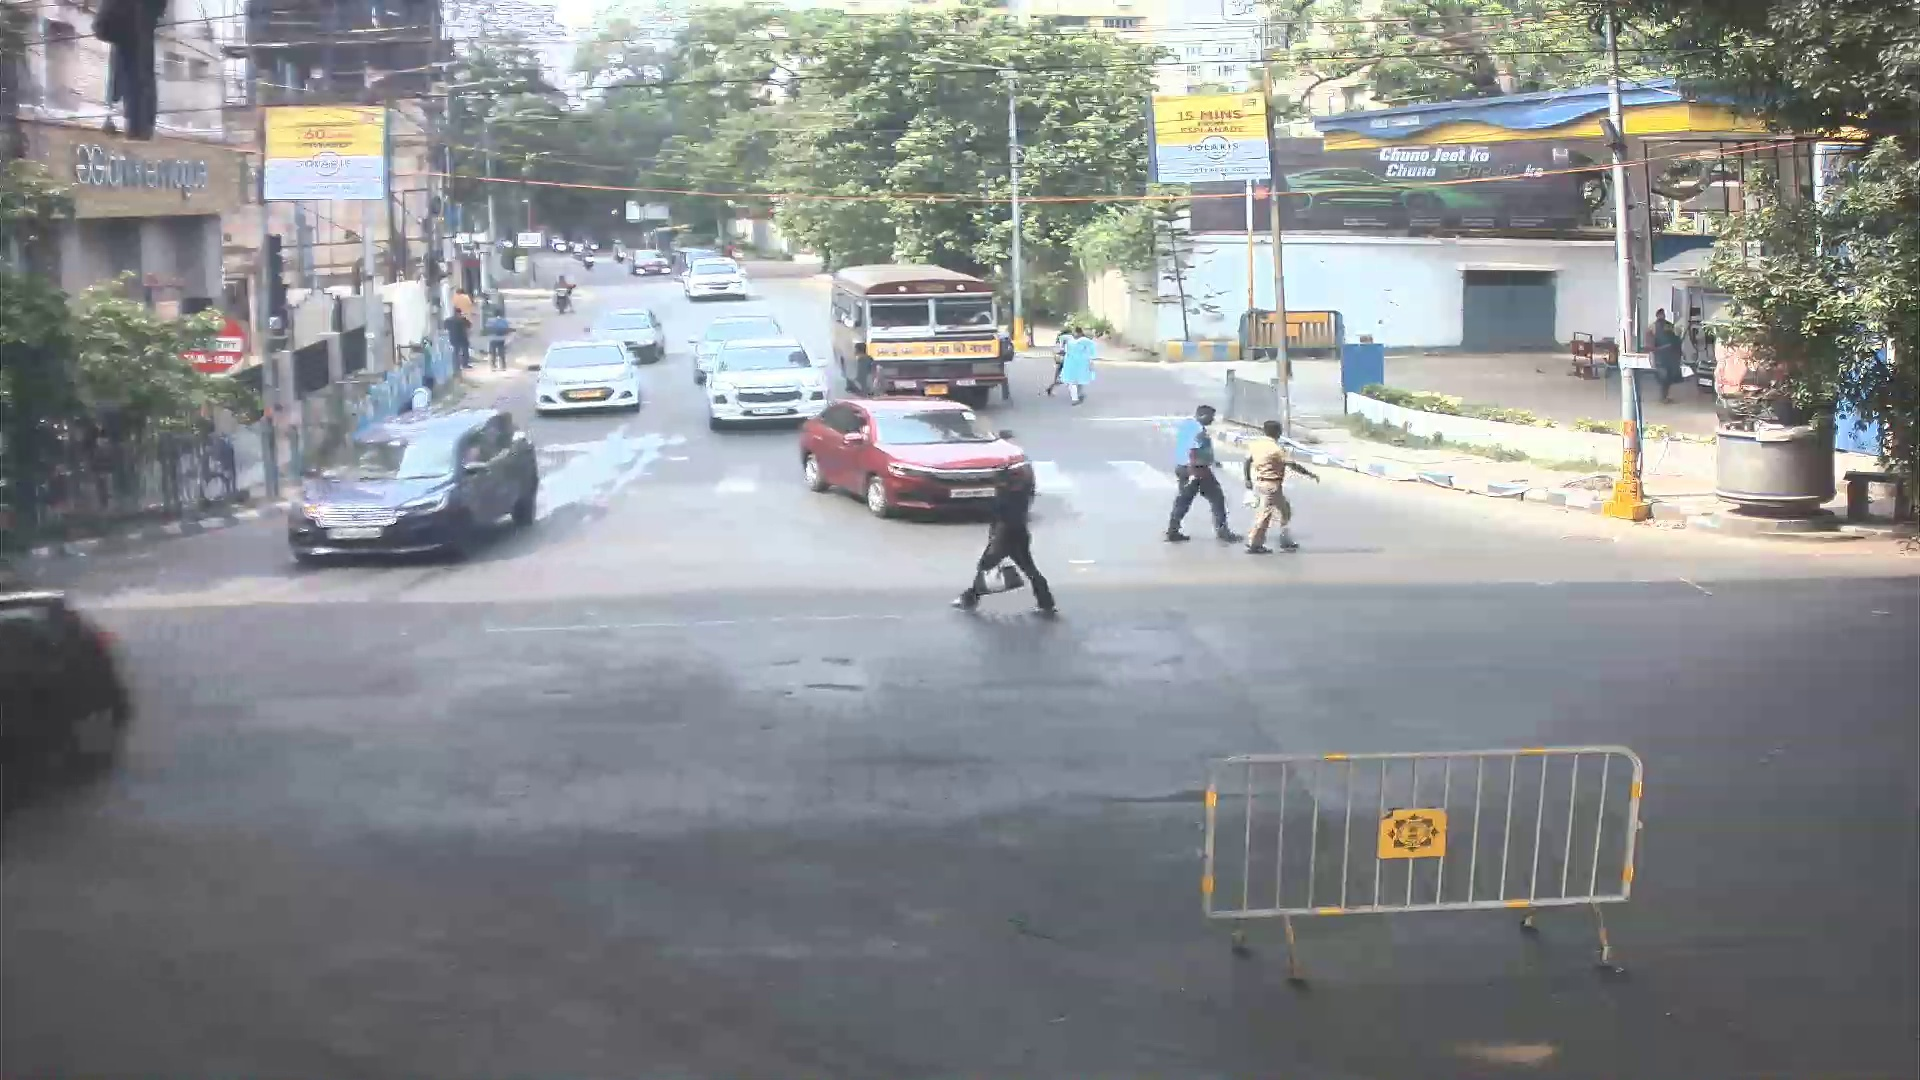

In [ ]:
from IPython.display import Image, display
import os

frame_files = os.listdir('frames')
for frame_file in sorted(frame_files)[:5]:  # Display first 5 frames
    display(Image(filename=os.path.join('frames', frame_file)))


In [ ]:
import cv2
import os

def resize_frame(frame, size=(500, 500)):
    return cv2.resize(frame, size)

# Resize all frames in the 'frames' directory
resized_dir = 'resized_frames'
os.makedirs(resized_dir, exist_ok=True)

frame_files = sorted(os.listdir('frames'))
for frame_file in frame_files:
    frame_path = os.path.join('frames', frame_file)
    frame = cv2.imread(frame_path)
    resized_frame = resize_frame(frame)
    resized_frame_path = os.path.join(resized_dir, frame_file)
    cv2.imwrite(resized_frame_path, resized_frame)

print("All frames have been resized and saved in the 'resized_frames' directory.")


All frames have been resized and saved in the 'resized_frames' directory.


In [ ]:
!pip install torch torchvision


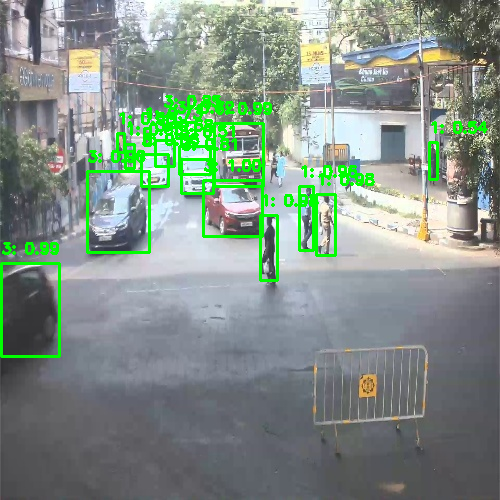

In [ ]:
import torch
import torchvision
from torchvision import transforms
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained Faster R-CNN model with the correct weights parameter
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
model.eval()

# Define the transform to convert the image to a tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

def detect_objects(image):
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        outputs = model(image_tensor)

    return outputs[0]

# Example usage: detect objects in a single resized frame
frame_path = 'resized_frames/frame_0000.jpg'
frame = cv2.imread(frame_path)
detections = detect_objects(frame)

# Process and display detections
for box, score, label in zip(detections['boxes'], detections['scores'], detections['labels']):
    if score > 0.5:  # Filter out weak detections
        x1, y1, x2, y2 = box.int().tolist()
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f'{label.item()}: {score:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2_imshow(frame)


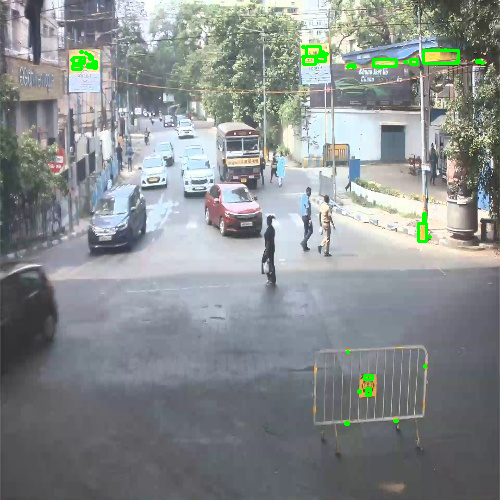

In [ ]:
import numpy as np
import cv2

def detect_yellow_poles(image):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for yellow color
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    # Create a mask for yellow color
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image

# Example usage: detect yellow poles in a single resized frame
frame_path = 'resized_frames/frame_0000.jpg'
frame = cv2.imread(frame_path)
result_frame = detect_yellow_poles(frame)

cv2_imshow(result_frame)


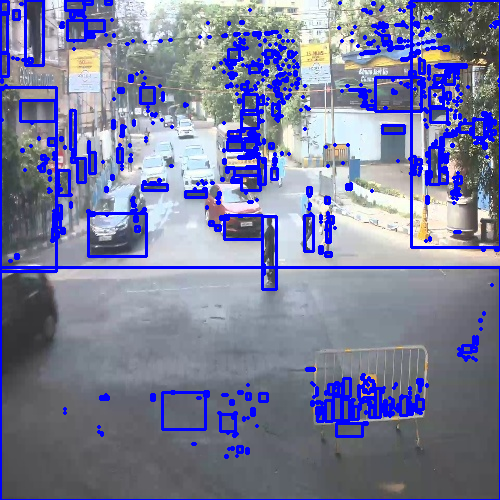

In [ ]:
def detect_waterlogged_areas(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to find dark regions (waterlogged areas)
    _, mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue color for waterlogged areas

    return image

# Example usage: detect waterlogged areas in a single resized frame
frame_path = 'resized_frames/frame_0000.jpg'
frame = cv2.imread(frame_path)
result_frame = detect_waterlogged_areas(frame)

cv2_imshow(result_frame)


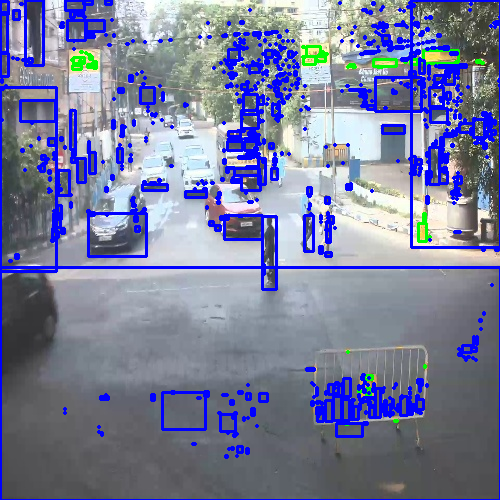

In [ ]:
def detect_yellow_poles_and_water(image):
    # Detect yellow poles
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    contours, _ = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green color for yellow poles

    # Detect waterlogged areas
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, water_mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(water_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue color for waterlogged areas

    return image

# Example usage: detect yellow poles and waterlogged areas in a single resized frame
frame_path = 'resized_frames/frame_0000.jpg'
frame = cv2.imread(frame_path)
result_frame = detect_yellow_poles_and_water(frame)

cv2_imshow(result_frame)


In [ ]:
output_dir = 'output_frames'
os.makedirs(output_dir, exist_ok=True)

frame_files = sorted(os.listdir('resized_frames'))
for frame_file in frame_files:
    frame_path = os.path.join('resized_frames', frame_file)
    frame = cv2.imread(frame_path)
    result_frame = detect_yellow_poles_and_water(frame)

    # Save the annotated frame
    output_frame_path = os.path.join(output_dir, frame_file)
    cv2.imwrite(output_frame_path, result_frame)

print("Detection and annotation completed. Annotated frames are saved in the 'output_frames' directory.")


Detection and annotation completed. Annotated frames are saved in the 'output_frames' directory.


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
os.listdir()


['.config',
 '6_A J C Bose Rd & Ballygunge Circular Rd (S)(44.32)2.mkv',
 'resized_frames',
 'frames',
 'output_frames',
 'sample_data']

In [ ]:
import os

# List contents of the '/content' directory
print(os.listdir('/content'))

# Access the 'output_frames' directory
output_frames_dir = '/content/output_frames'
print(os.listdir(output_frames_dir))


['.config', '6_A J C Bose Rd & Ballygunge Circular Rd (S)(44.32)2.mkv', 'resized_frames', 'frames', 'output_frames', 'sample_data']
['frame_1432.jpg', 'frame_1057.jpg', 'frame_1147.jpg', 'frame_0014.jpg', 'frame_4132.jpg', 'frame_2257.jpg', 'frame_2999.jpg', 'frame_1075.jpg', 'frame_1903.jpg', 'frame_3012.jpg', 'frame_0985.jpg', 'frame_2230.jpg', 'frame_1900.jpg', 'frame_2112.jpg', 'frame_0103.jpg', 'frame_1020.jpg', 'frame_3898.jpg', 'frame_1865.jpg', 'frame_0281.jpg', 'frame_1939.jpg', 'frame_2559.jpg', 'frame_1821.jpg', 'frame_0503.jpg', 'frame_3711.jpg', 'frame_0982.jpg', 'frame_2724.jpg', 'frame_3084.jpg', 'frame_0425.jpg', 'frame_2414.jpg', 'frame_1884.jpg', 'frame_2923.jpg', 'frame_3432.jpg', 'frame_0674.jpg', 'frame_1016.jpg', 'frame_1430.jpg', 'frame_0026.jpg', 'frame_2246.jpg', 'frame_2935.jpg', 'frame_0010.jpg', 'frame_0924.jpg', 'frame_1623.jpg', 'frame_1426.jpg', 'frame_3731.jpg', 'frame_3187.jpg', 'frame_3956.jpg', 'frame_1090.jpg', 'frame_3915.jpg', 'frame_1443.jpg', 'fr

In [ ]:
from google.colab import files
import shutil

# Zip the 'output_frames' directory
shutil.make_archive('/content/output_frames', 'zip', '/content/output_frames')

# Download the zip file
files.download('/content/output_frames.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>